In [41]:
import numpy as np
import matplotlib.pyplot as plt

from framework_pkg.framework import FrameWork

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['text.usetex']=True
plt.style.use('classic')


param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0., #0-0.02
        'mu3'  : 0.  ,
        'mdm'  : 1e-7, 
        'alpha': 0.  , #0-pi
        'eps' : 0.  , #0-0.5
        'alpha_eps' : 0.  , #0-pi
        'M12'  : 6.9e-5 }

In [42]:
""" expected event rate per day per 32.5 kilo ton assuming no oscillation 
(The value should be matched with 294.7 per day per 32.5 kilo ton) """

frame_expected_event_rate  = FrameWork(threshold=3.5,
                                        efficiency_correction=False,
                                        resolution_correction=False,
                                    )

mc_expected_event = frame_expected_event_rate.unoscillated_expected_event_rate
print(mc_expected_event)

[294.63483945]


In [43]:
""" predicted fraction of total signal in comparsion to expected unoscillation total signal """

frame_predicted_total_signal  = FrameWork(threshold=3.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                    )

predicted_total_signal = frame_predicted_total_signal.__getitem__(param) 

print(np.mean(predicted_total_signal))

2.311894841757006


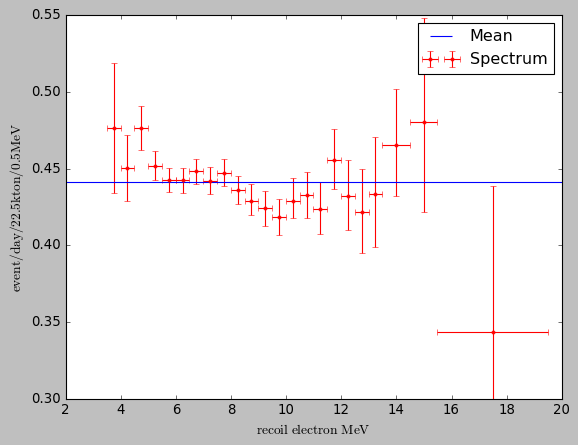

In [44]:
"""data illustration : B8 and hep
in comparsion with Fig 37 in paper Phys. Rev. D 109, 092001 (2024).
"""

frame_expected_spectrum  = FrameWork(threshold=3.5,
                                     efficiency_correction=False,
                                     resolution_correction=True,)

spectrum_data = frame_expected_spectrum.spectrum_data
energy_obs    = frame_expected_spectrum.energy_obs

plt.ylim(0.3,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), spectrum_data[:,2] / (spectrum_data[:,11] + spectrum_data[:,12]),
             yerr = np.array([spectrum_data[:,4], spectrum_data[:,3]]) / (spectrum_data[:,11] + spectrum_data[:,12]), 
             xerr = 0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='r.')

plt.hlines(xmin=2,xmax=20,y=0.441)

plt.legend(['Mean','Spectrum'])

<ErrorbarContainer object of 3 artists>

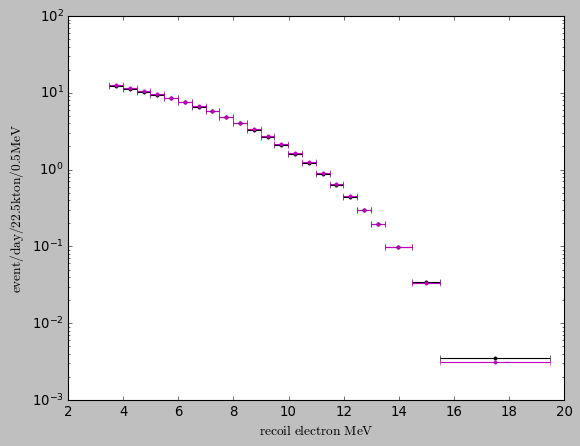

In [45]:
"""
Comparsion between our predection and the Fig36 in paper Phys. Rev. D 109, 092001 (2024).
expected B8 spectrum assuming no oscilation.
"""

b_un_per_day  = frame_expected_spectrum.unoscillated_expected_spectrum

plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')
plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), (0.5 / (energy_obs[:,1] - energy_obs[:,0])) * spectrum_data[:,11] * 22.5 / 365.25,
             yerr=None, xerr = 0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='k.' )
plt.errorbar(0.5 * (energy_obs[:,1] + energy_obs[:,0]), (0.5 / (energy_obs[:,1] - energy_obs[:,0])) * b_un_per_day ,
             yerr=None, xerr = 0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='m.')


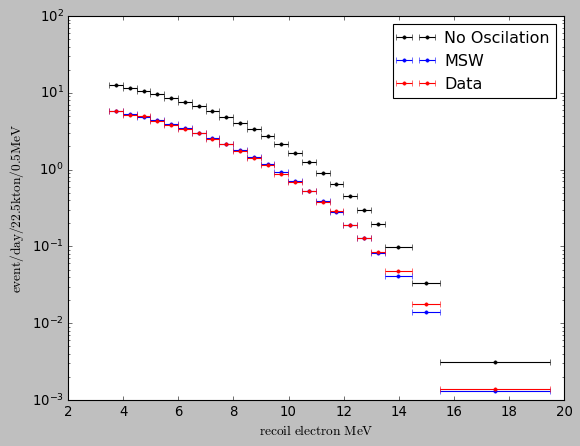

In [46]:

"""
B8 spectrum predection
"""
param['M12'] = 7.5e-5

msw_fraction = frame_expected_spectrum.__getitem__(param) 
spectrum_event_per_day = frame_expected_spectrum._pridection_function()

plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5 * (energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1] - energy_obs[:,0])) * b_un_per_day,
             yerr=None,  xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='k.')
plt.errorbar(0.5 * (energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1] - energy_obs[:,0])) * spectrum_event_per_day,
             yerr=None, xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='b.')
plt.errorbar(0.5 * (energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1] - energy_obs[:,0])) * spectrum_data[:,2] * 22.5 / 365.25 ,
             yerr=None,  xerr =0.5 * (energy_obs[:,1] - energy_obs[:,0]), fmt='r.')

plt.legend(['No Oscilation', 'MSW', 'Data'])